# Я ждал этого метода полтора года!

Тщательное вычисление количества букв в моем имени по модулю 11 дало 3, поэтому я буду интегрировать представленное в третьем варианте нечто: $$(\frac x a + \frac y b + \frac z c)^2 < \frac x p + \frac y q$$

Мне больно думать о том, каковы должны быть размеры коробки, в которую это нужно поместить, поэтому будем брать максимум из всех имеющихся параметров задачи за характерный и смотреть, при каком коэффициенте перед ним есть хорошая сходимость.

За дело!


Volume = 0.14696602632000003


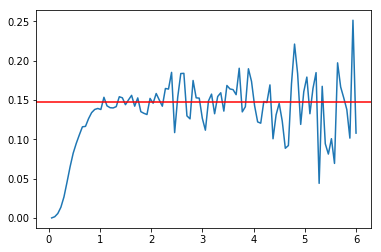

In [106]:


import numpy as np


def func(x, y, z, a, b, c, p ,q):
    return (x/a + y/b + z/c) ** 2 - x/p - y/q

def volume(a, b, c, p , q, num, scale = 100):
    kd = np.linspace(0.01, 0.01*scale, num = 100)


    yl = np.zeros((100))
    s = 0

    for h in kd:
        bounds = h*np.maximum(a, np.maximum(b,np.maximum(c,np.maximum(p, q))))
        x = np.random.uniform(0, bounds, num) 
        y = np.random.uniform(0, bounds, num)
        z = np.random.uniform(0, bounds , num)
        count = 0

        for i, j, k in zip(x,y,z):
            if func(i,j,k, a, b, c, p, q) < 0:
                count+=1

        Volume = count/num * bounds * bounds * bounds 
        yl[s] = Volume
        s+=1
    return kd*np.maximum(a, np.maximum(b,np.maximum(c,np.maximum(p, q)))), yl

kd, yl = volume(2, 3, 4, 5, 6, 10000)

    
import matplotlib.pyplot as plt

plt.plot(kd, yl)

    
print("Volume =", np.average(yl[20:30]))
plt.axhline(y=np.average(yl[20:30]), color='r', linestyle='-')
plt.show()

Видим, что нужны размеры коробки около 2. При дальнейшем их увеличении результат начинает лихо флуктуировать (это связано с тем, что для выделенного объема мы бросаем слишком мало точек). Поэтому берем ее в качестве искомого размера и добавляем точности.

In [112]:
def full_on(a, b, c, p , q, bounds, num = 10000000):
    count = 0
    x = np.random.uniform(0, bounds, num) 
    y = np.random.uniform(0, bounds, num)
    z = np.random.uniform(0, bounds , num)

    for i, j, k in zip(x,y,z):
        if func(i,j,k, a, b, c, p, q) < 0:
            count+=1
    Volume = count/num * bounds * bounds * bounds 
    
    return Volume
    
print(full_on(2,3,4,5,6,2))

0.1472664


Еще раз, для закрепления!

Volume = 66.09177367532293


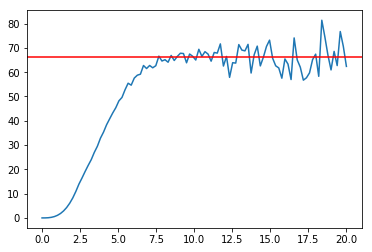

In [113]:
kd, yl = volume(1, 1, 1, 0.1, 0.1, 10000, 2000)

    
import matplotlib.pyplot as plt

plt.plot(kd, yl)

    
print("Volume =", np.average(yl[40:50]))
plt.axhline(y=np.average(yl[40:50]), color='r', linestyle='-')
plt.show()

Берем где-то 10

In [114]:
print(full_on(1, 1, 1, 0.1, 0.1, 10))

66.6683
